In [3]:
import matplotlib.pyplot as plt
from collections import Counter
import re

import os
from tqdm import tqdm

def load_speaker_map(file_path):
    speaker_map = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if not line.strip():
                continue
            fields = line.strip().split('|')
            if len(fields) > 7:  # Ensure fields[1] (speech_id) and fields[7] (party) exist
                speaker_map[fields[1]] = fields[7]
    return speaker_map

def split_speeches_by_party(speaker_map_path, speeches_path, output_dir):
    # Load the speaker map
    speaker_map = load_speaker_map(speaker_map_path)
    
    # Prepare output file paths
    republican_file = os.path.join(output_dir, "republican_speeches.txt")
    democratic_file = os.path.join(output_dir, "democratic_speeches.txt")
    
    # Open output files for writing
    with open(republican_file, 'w', encoding='utf-8') as rep_file, \
         open(democratic_file, 'w', encoding='utf-8') as dem_file:
        
        # Read speeches and classify them
        with open(speeches_path, 'r', encoding='utf-8', errors='ignore') as speeches_file:
            for line in tqdm(speeches_file, desc="Processing speeches"):
                if not line.strip():
                    continue
                fields = line.strip().split('|')
                if len(fields) > 1:  # Ensure there's a speech ID and text
                    speech_id = fields[0]
                    speech_text = fields[1]

                    # Get the party for this speech
                    party = speaker_map.get(speech_id)
                    if party == 'R':
                        rep_file.write(line)
                    elif party == 'D':
                        dem_file.write(line)

    print(f"Republican speeches saved to: {republican_file}")
    print(f"Democratic speeches saved to: {democratic_file}")

# Main function
def main():
    # File paths
    speaker_map_path = "C:/Users/hanst/Downloads/114_SpeakerMap.txt"  # Replace with your actual file path
    speeches_path = "C:/Users/hanst/Downloads/speeches_114.txt"  # Replace with your actual file path
    output_dir = "C:/Users/hanst/Downloads/output_speeches"  # Replace with your desired output directory
    
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Split speeches by party
    split_speeches_by_party(speaker_map_path, speeches_path, output_dir)

if __name__ == "__main__":
    main()

Processing speeches: 112291it [00:00, 211178.71it/s]

Republican speeches saved to: C:/Users/hanst/Downloads/output_speeches\republican_speeches.txt
Democratic speeches saved to: C:/Users/hanst/Downloads/output_speeches\democratic_speeches.txt


Counting word frequencies...
Normalizing word frequencies...
Comparing word frequencies...
Plotting results...


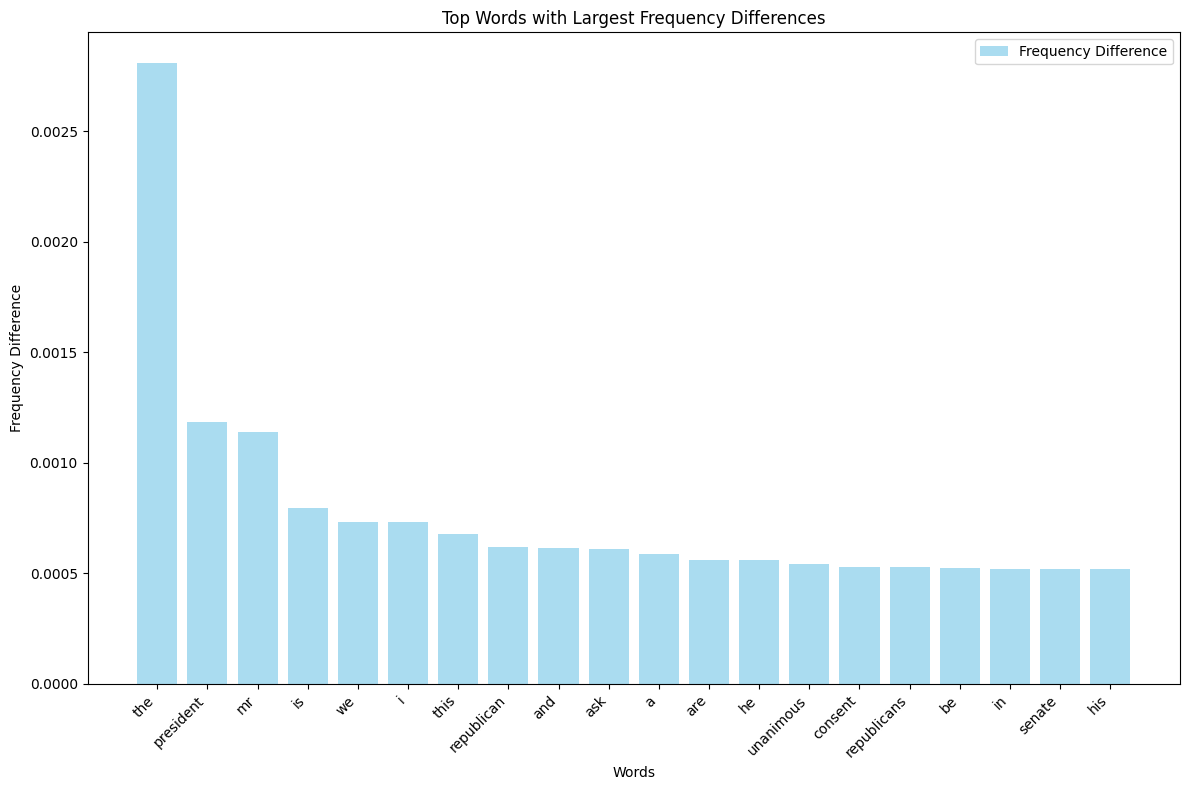

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def count_word_frequencies(file_path):
    """
    Counts word frequencies in a given text file.
    
    Args:
        file_path (str): Path to the text file.
    
    Returns:
        Counter: A Counter object with word frequencies.
    """
    word_counts = Counter()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Tokenize each line into words
            words = re.findall(r'\b\w+\b', line.lower())
            word_counts.update(words)
    return word_counts

def compute_normalized_frequencies(counter):
    """
    Normalizes word frequencies by dividing by the total word count.
    
    Args:
        counter (Counter): A Counter object with word frequencies.
    
    Returns:
        dict: A dictionary with normalized word frequencies.
    """
    total_count = sum(counter.values())
    return {word: count / total_count for word, count in counter.items()}

def compare_word_frequencies(rep_freqs, dem_freqs, top_n=50):
    """
    Compares word frequencies between Republicans and Democrats.
    
    Args:
        rep_freqs (dict): Normalized word frequencies for Republicans.
        dem_freqs (dict): Normalized word frequencies for Democrats.
        top_n (int): Number of top words to plot.
    
    Returns:
        list: Top words with their frequency differences.
    """
    all_words = set(rep_freqs.keys()).union(set(dem_freqs.keys()))
    differences = []

    for word in all_words:
        rep_freq = rep_freqs.get(word, 0)
        dem_freq = dem_freqs.get(word, 0)
        diff = abs(rep_freq - dem_freq)
        differences.append((word, diff, rep_freq, dem_freq))

    # Sort by absolute difference
    differences.sort(key=lambda x: x[1], reverse=True)
    return differences[:top_n]

def plot_word_differences(word_differences):
    """
    Plots the words with the biggest frequency differences.
    
    Args:
        word_differences (list): List of tuples (word, difference, rep_freq, dem_freq).
    """
    words = [item[0] for item in word_differences]
    differences = [item[1] for item in word_differences]
    rep_freqs = [item[2] for item in word_differences]
    dem_freqs = [item[3] for item in word_differences]

    x = range(len(words))

    # Plot the differences
    plt.figure(figsize=(12, 8))
    plt.bar(x, differences, color='skyblue', alpha=0.7, label='Frequency Difference')
    plt.xticks(x, words, rotation=45, ha='right')
    plt.xlabel('Words')
    plt.ylabel('Frequency Difference')
    plt.title('Top Words with Largest Frequency Differences')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main Function
def main():
    republican_file = "C:/Users/hanst/Downloads/output_speeches/republican_speeches.txt"  # Replace with actual file path
    democratic_file = "C:/Users/hanst/Downloads/output_speeches/democratic_speeches.txt"  # Replace with actual file path

    # Count word frequencies for both files
    print("Counting word frequencies...")
    rep_counts = count_word_frequencies(republican_file)
    dem_counts = count_word_frequencies(democratic_file)

    # Normalize frequencies
    print("Normalizing word frequencies...")
    rep_freqs = compute_normalized_frequencies(rep_counts)
    dem_freqs = compute_normalized_frequencies(dem_counts)

    # Compare and get top differences
    print("Comparing word frequencies...")
    top_differences = compare_word_frequencies(rep_freqs, dem_freqs, top_n=20)

    # Plot the results
    print("Plotting results...")
    plot_word_differences(top_differences)

if __name__ == "__main__":
    main()

Counting word frequencies...
Normalizing word frequencies...
Comparing word frequencies...
Plotting results...


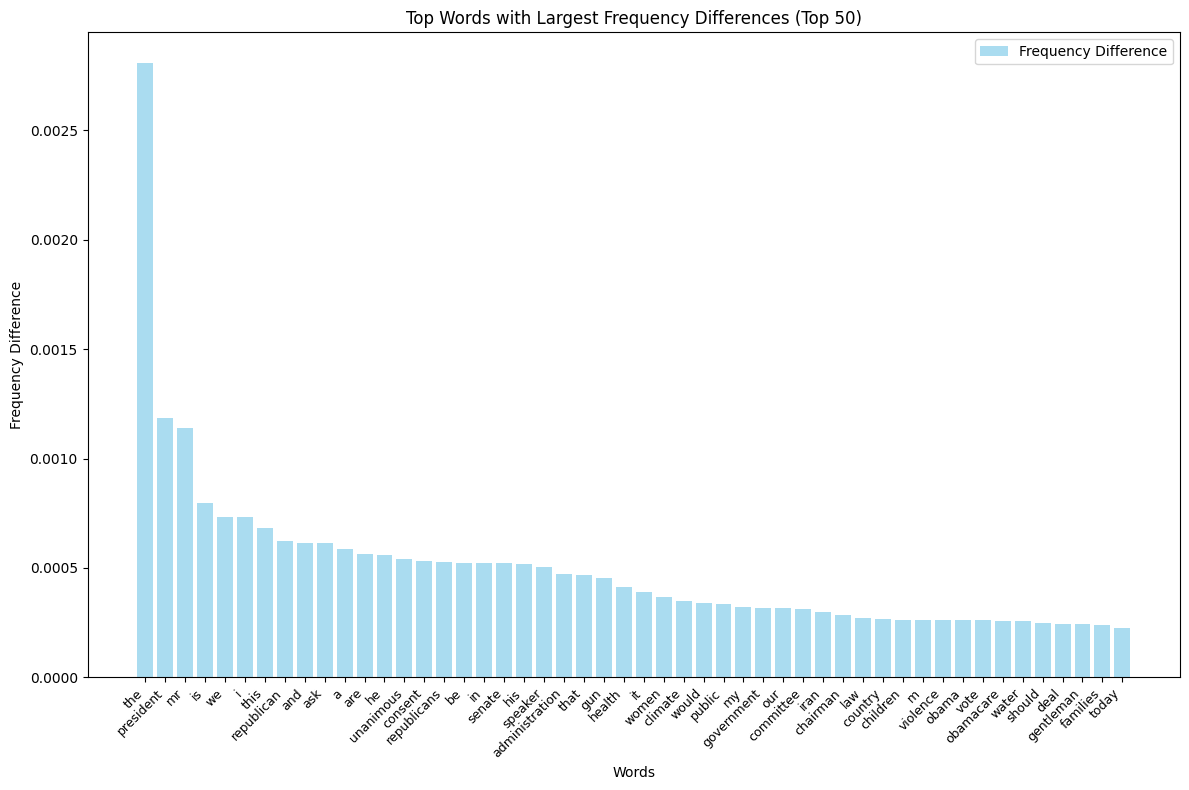

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def count_word_frequencies(file_path):
    word_counts = Counter()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            words = re.findall(r'\b\w+\b', line.lower())
            word_counts.update(words)
    return word_counts

def compute_normalized_frequencies(counter):
    total_count = sum(counter.values())
    return {word: count / total_count for word, count in counter.items()}

def compare_word_frequencies(rep_freqs, dem_freqs, top_n=50):
    all_words = set(rep_freqs.keys()).union(set(dem_freqs.keys()))
    differences = []

    for word in all_words:
        rep_freq = rep_freqs.get(word, 0)
        dem_freq = dem_freqs.get(word, 0)
        diff = abs(rep_freq - dem_freq)
        differences.append((word, diff, rep_freq, dem_freq))

    differences.sort(key=lambda x: x[1], reverse=True)
    return differences[:top_n]

def plot_word_differences(word_differences):
    words = [item[0] for item in word_differences]
    differences = [item[1] for item in word_differences]
    rep_freqs = [item[2] for item in word_differences]
    dem_freqs = [item[3] for item in word_differences]

    x = range(len(words))

    # Plot the differences
    plt.figure(figsize=(12, 8))
    plt.bar(x, differences, color='skyblue', alpha=0.7, label='Frequency Difference')
    plt.xticks(x, words, rotation=45, ha='right', fontsize=9)
    plt.xlabel('Words')
    plt.ylabel('Frequency Difference')
    plt.title('Top Words with Largest Frequency Differences (Top 50)')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    republican_file = "C:/Users/hanst/Downloads/output_speeches/republican_speeches.txt"  # Replace with actual file path
    democratic_file = "C:/Users/hanst/Downloads/output_speeches/democratic_speeches.txt"  # Replace with actual file path

    print("Counting word frequencies...")
    rep_counts = count_word_frequencies(republican_file)
    dem_counts = count_word_frequencies(democratic_file)

    print("Normalizing word frequencies...")
    rep_freqs = compute_normalized_frequencies(rep_counts)
    dem_freqs = compute_normalized_frequencies(dem_counts)

    print("Comparing word frequencies...")
    top_differences = compare_word_frequencies(rep_freqs, dem_freqs, top_n=50)  # Show top 50 words

    print("Plotting results...")
    plot_word_differences(top_differences)

if __name__ == "__main__":
    main()